## **Ridge Quantile Regression**

[![Slides](https://img.shields.io/badge/🦌-ReHLine-blueviolet)](https://rehline-python.readthedocs.io/en/latest/)

The regularized quantile regression solves the following optimization problem:

$$
min_{\beta \in \mathbb{R}^{d}} \ C \sum_{i=1}^n  \rho_\kappa ( y_i - x^\intercal_i \beta ) + \frac{1}{2} \| \beta \|^2,
$$

where $\rho_\kappa(u) = u\cdot(\kappa - \mathbf{1}(u < 0))$ is the check loss,
$x_i \in \mathbb{R}^d$ is a feature vector, $y_i \in \mathbb{R}$ is the response variable.

> **Note.** Since the check loss is a plq function, thus we can solve it by `rehline.plqERM_Ridge`.

In [1]:
## simulate data
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

n, d = 10000, 5
X, y = make_regression(n_samples=n, n_features=d, noise=1.0)
X = scaler.fit_transform(X)
## add intercept
X = np.hstack((X,np.ones((n,1))))
y = y/y.std()

In [2]:
## solve QR with different `qt` via `plqERM_Ridge`
from rehline import plqERM_Ridge

clf5 = plqERM_Ridge(loss={'name': 'QR', 'qt': 0.05}, C=10.0/n)
clf5.fit(X=X, y=y)

clf95 = plqERM_Ridge(loss={'name': 'QR', 'qt': 0.95}, C=10.0/n)
clf95.fit(X=X, y=y)

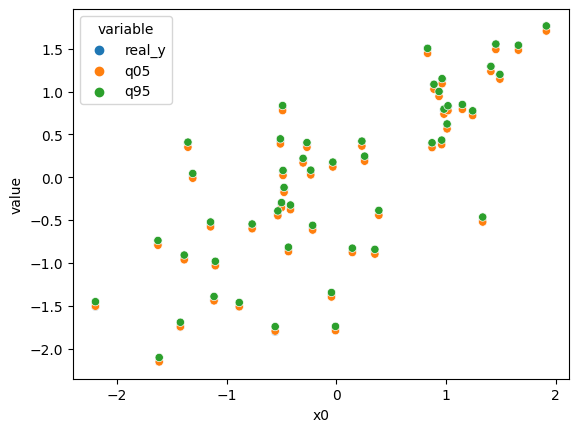

In [3]:
## plot QR results
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", "is_categorical_dtype")

n_sample = 50
X_sample, y_sample = X[:n_sample], y[:n_sample]
q05_sample = clf5.decision_function(X_sample)
q95_sample = clf95.decision_function(X_sample)

df = pd.DataFrame({'x0': X_sample[:,0], 'real_y': y_sample, 'q05': q05_sample, 'q95': q95_sample})
df = df.melt(id_vars='x0')

sns.scatterplot(data=df, x='x0', y='value', hue='variable')
plt.show()